In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

import itertools
colors = itertools.cycle(('r', 'y', 'b', 'g', 'c'))

In [2]:
def get_run(users, emails):
    filename = '{}user{}emails.txt'.format(users, emails)
    run = {}
    with open(filename) as f:
        for line in f:
            key, value = line.split()
            value = float(value)
            run.setdefault(key, []).append(value)
    return run

In [3]:
metrics = []
for users in [1, 5, 10, 25, 50]:
    metrics.append((users, get_run(1, users)))

In [4]:
for users, value in metrics:
    print users
    for key in value:
        if key.startswith('sync-soledad'):
            print key, value[key]

1
sync-soledad-get-remote-state [8.63673, 1.40799, 1.11357, 1.30346]
sync-soledad-download-docs [2.87817, 1.55906]
sync-soledad-upload-docs [6e-05, 10.65153]
sync-soledad-diff-docs [9e-05, 9e-05, 4e-05, 6e-05, 5e-05, 6e-05]
5
sync-soledad-get-remote-state [3.5657, 1.43593, 1.12, 1.39652]
sync-soledad-download-docs [7.16461, 2.09052]
sync-soledad-upload-docs [6e-05, 61.96019]
sync-soledad-diff-docs [9e-05, 0.00011, 5e-05, 0.0001, 8e-05, 5e-05]
10
sync-soledad-get-remote-state [2.71554, 1.4165, 1.46953, 1.61918]
sync-soledad-download-docs [8.79325, 2.09119]
sync-soledad-upload-docs [0.00011, 120.78367]
sync-soledad-diff-docs [7e-05, 8e-05, 6e-05, 0.00016, 0.00013, 6e-05]
25
sync-soledad-get-remote-state [2.50424, 1.87172, 1.16671, 1.26925]
sync-soledad-download-docs [13.32335, 1.88078]
sync-soledad-upload-docs [7e-05, 313.41971]
sync-soledad-diff-docs [7e-05, 0.00016, 8e-05, 0.00106, 0.00024, 5e-05]
50
sync-soledad-get-remote-state [2.40121, 2.08066, 1.18923, 1.28188]
sync-soledad-downlo

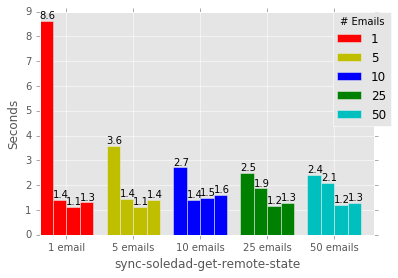

In [5]:
metric_name = 'sync-soledad-get-remote-state'

plt.figure()
plt.ylabel('Seconds')
plt.xlabel(metric_name)

indices = np.arange(len(metrics[0][1][metric_name]))
width = 1

for key, value in metrics:
    plt.bar(indices, value[metric_name], width=width, label=key, color=colors.next())
    
    for idx, elem in enumerate(value[metric_name]):
        plt.annotate("{0:.1f}".format(elem), (indices[idx], elem + 0.1))
        
    indices = indices + len(indices) + width

plt.xticks((2, 7, 12, 17, 22), ('1 email', '5 emails', '10 emails', '25 emails', '50 emails'))
plt.legend(title='# Emails', bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.savefig(metric_name + '.png', bbox_inches='tight', dpi=200)

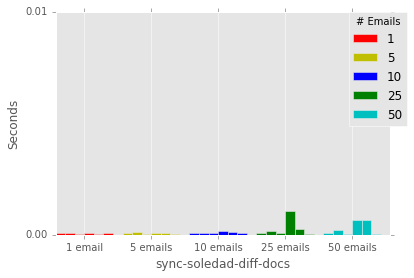

In [6]:
metric_name = 'sync-soledad-diff-docs'

plt.figure()
plt.ylabel('Seconds')
plt.xlabel(metric_name)

indices = np.arange(len(metrics[0][1][metric_name]))
width = 1

for key, value in metrics:
    plt.bar(indices, value[metric_name], width=width, label=key, color=colors.next())
        
    indices = indices + len(indices) + width
plt.yticks((0, 0.01))
plt.xticks((3, 10, 17, 24, 31), ('1 email', '5 emails', '10 emails', '25 emails', '50 emails'))
plt.legend(title='# Emails', bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.savefig(metric_name + '.png', bbox_inches='tight', dpi=200)

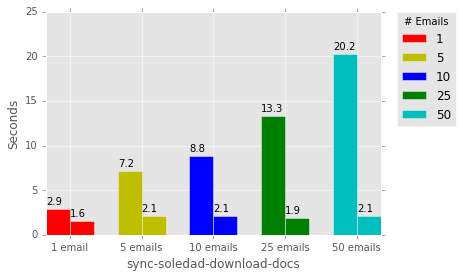

In [7]:
metric_name = 'sync-soledad-download-docs'

plt.figure()
plt.ylabel('Seconds')
plt.xlabel(metric_name)

indices = np.arange(len(metrics[0][1][metric_name]))
width = 1

for key, value in metrics:
    plt.bar(indices, value[metric_name], width=width, label=key, color=colors.next())
    
    for idx, elem in enumerate(value[metric_name]):
        plt.annotate("{0:.1f}".format(elem), (indices[idx], elem + 0.5))
    
    indices = indices + len(indices) + width

plt.xticks((1, 4, 7, 10, 13), ('1 email', '5 emails', '10 emails', '25 emails', '50 emails'))
plt.legend(title='# Emails', bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.savefig(metric_name + '.png', bbox_inches='tight', dpi=200)

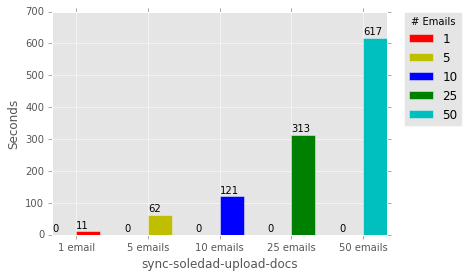

In [8]:
metric_name = 'sync-soledad-upload-docs'

plt.figure()
plt.ylabel('Seconds')
plt.xlabel(metric_name)

indices = np.arange(len(metrics[0][1][metric_name]))
width = 1

for key, value in metrics:
    plt.bar(indices, value[metric_name], width=width, label=key, color=colors.next())
    
    for idx, elem in enumerate(value[metric_name]):
        plt.annotate("{0:.0f}".format(elem), (indices[idx], elem + 10))
    
    indices = indices + len(indices) + width

plt.xticks((1, 4, 7, 10, 13), ('1 email', '5 emails', '10 emails', '25 emails', '50 emails'))
plt.legend(title='# Emails', bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.savefig(metric_name + '.png', bbox_inches='tight', dpi=200)